# Discusión 5: interpolación de Lagrange

In [106]:
from sympy import *
import matplotlib.pyplot as plt;
import numpy as np

from sympy.interactive import printing;
printing.init_printing(use_latex=True);
from IPython.display import display, Latex

In [107]:
x = Symbol('x')

In [129]:
def f(z):
    return sin(pi*z)

xs = [1950, 1960, 1970, 1980, 1990, 2000]
ys = [151326000, 179323000, 203302000, 226542000, 249633000,  281422000]

In [130]:
def lagrangePolynomial(xs, ys, degree):
    polynomial = 0.0;
    for i in range(0, degree + 1):
        polynomial += ys[i]*lagrangeBasisFunction(xs, degree, i)
    return polynomial    
        
def lagrangeBasisFunction(xs, n, i):
    L = 1.0
    for j in range(0, n + 1):
        if j == i:
            continue
        else:
            L *= (x - xs[j])/(xs[i] - xs[j])
    return L        

In [131]:
pol = lagrangePolynomial(xs, ys, 5)

In [133]:
pol.subs(x, 1985).evalf()

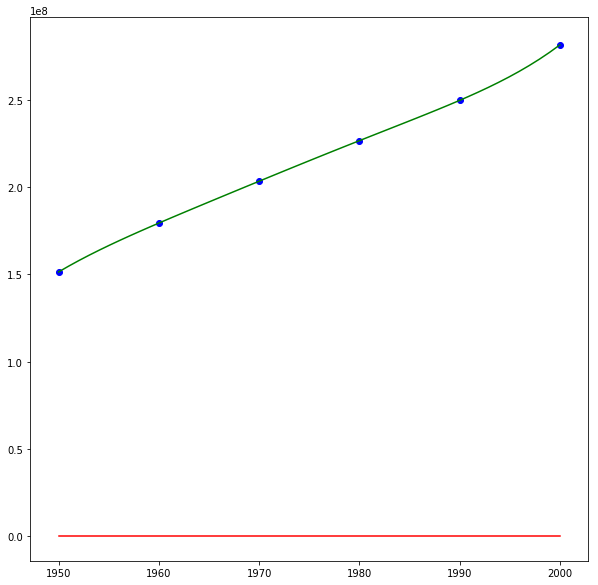

In [135]:
fig, ax = plt.subplots(figsize=(10, 10));

lambdaf = lambdify(x, pol)

xv = np.linspace(1950, 2000, 50);
ax.plot(xv, lambdaf(xv), color='green');
ax.plot(xv, np.sin(np.pi*xv), color = 'red')
ax.scatter(xs, ys, color='blue', marker='o');
plt.show(); 

In [128]:
display(Latex('$$ p_{3}(x) = '+ latex(simplify(pol.evalf())) + '$$'))

<IPython.core.display.Latex object>